# A estrutura e por que precisamos dela
Nos cadernos anteriores, apresentamos alguns conceitos relativos à avaliação de modelos preditivos. Embora esta seção possa ser um pouco redundante, pretendemos entrar em detalhes na estrutura de validação cruzada.

Antes de começarmos, vamos nos deter nas razões para sempre ter conjuntos de treinamento e teste. Vejamos primeiro a limitação de usar um conjunto de dados sem excluir nenhuma amostra.

Para ilustrar os diferentes conceitos, usaremos o conjunto de dados de habitação da Califórnia.

In [1]:
from sklearn.datasets import fetch_california_housing
 
housing = fetch_california_housing(as_frame=True)
data, target = housing.data, housing.target

Neste conjunto de dados, o objetivo é prever o valor médio das casas em uma área
Em califórnia. Os recursos coletados são baseados em imóveis gerais e
informações geográficas.

Portanto, a tarefa a ser resolvida é diferente da mostrada na seção anterior
caderno. O alvo a ser previsto é uma variável contínua e não mais
discreto. Essa tarefa é chamada de regressão.

Isso, vamos usar um modelo preditivo específico para regressão e não para
classificação.

In [2]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Para simplificar a visualização futura, vamos transformar os preços do
dólar (\\$) variando até o intervalo de mil dólares (k\\$).

In [3]:
target *= 100
target.head()

0    452.6
1    358.5
2    352.1
3    341.3
4    342.2
Name: MedHouseVal, dtype: float64

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">Se você quiser uma visão geral mais aprofundada sobre este conjunto de dados, pode consultar o
Appendix - Datasets seção de descrição no final deste MOOC.</p>
</div>

## Erro de treinamento vs erro de teste

Para resolver essa tarefa de regressão, usaremos um regressor de árvore de decisão.

In [4]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(data, target)

DecisionTreeRegressor(random_state=0)

Depois de treinar o regressor, gostaríamos de saber seu potencial estatístico
desempenho uma vez implantado na produção. Para este propósito, usamos a média
erro absoluto, o que nos dá um erro na unidade nativa, ou seja, k\\$.

In [6]:
from sklearn.metrics import mean_absolute_error

target_predicted = regressor.predict(data)
score = mean_absolute_error(target, target_predicted)
print(f"Em média, nosso regressor comete um erro de {score:.2f} k$")

Em média, nosso regressor comete um erro de 0.00 k$


Obtemos uma previsão perfeita sem erros. É muito otimista e quase
sempre revelando um problema metodológico ao fazer o aprendizado de máquina.

Na verdade, treinamos e previmos no mesmo conjunto de dados. Desde nossa árvore de decisão
foi totalmente desenvolvido, cada amostra no conjunto de dados é armazenada em um nó folha.
Portanto, nossa árvore de decisão memorizou totalmente o conjunto de dados fornecido durante o `ajuste`
e, portanto, não cometeu nenhum erro ao prever.

Este erro calculado acima é chamado de **erro empírico** ou **treinamento
erro**.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">In this MOOC, we will consistently use the term "training error".</p>
</div>

Treinamos um modelo preditivo para minimizar o erro de treinamento, mas nosso objetivo é
para minimizar o erro em dados que não foram vistos durante o treinamento.

Este erro também é chamado de **erro de generalização** ou "verdadeiro"
**erro de teste**.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">In this MOOC, we will consistently use the term "testing error".</p>
</div>

Assim, a avaliação mais básica envolve:

* dividir nosso conjunto de dados em dois subconjuntos: um conjunto de treinamento e um conjunto de teste;
* adequação do modelo ao conjunto de treinamento;
* estimar o erro de treinamento no conjunto de treinamento;
* estimar o erro de teste no conjunto de teste.

Então, vamos dividir nosso conjunto de dados.

In [7]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)

Então, vamos treinar nosso modelo.

In [9]:
regressor.fit(data_train, target_train)

DecisionTreeRegressor(random_state=0)

Finalmente, estimamos os diferentes tipos de erros. Vamos começar computando
o erro de treinamento.

In [11]:
target_predicted = regressor.predict(data_train)
score = mean_absolute_error(target_train, target_predicted)
print(f"O erro de treinamento do nosso modelo é {score:.2f} k$")

O erro de treinamento do nosso modelo é 0.00 k$


We observe the same phenomena as in the previous experiment: our model
memorized the training set. However, we now compute the testing error.

In [12]:
target_predicted = regressor.predict(data_test)
score = mean_absolute_error(target_test, target_predicted)
print(f"O erro de teste do nosso modelo é {score:.2f} k$")

O erro de teste do nosso modelo é 47.28 k$


Este erro de teste é realmente sobre o que esperaríamos de nosso modelo se
foi usado em um ambiente de produção.

## Estabilidade das estimativas de validação cruzada

Ao fazer uma divisão de teste de trem único, não damos qualquer indicação sobre
a robustez da avaliação do nosso modelo preditivo: em particular, se
o conjunto de teste é pequeno, esta estimativa do erro de teste será
instável e não refletiria a "taxa de erro real" que teríamos observado
com o mesmo modelo em uma quantidade ilimitada de dados de teste.

Por exemplo, poderíamos ter tido sorte quando fizemos nossa divisão aleatória de nosso
conjunto de dados limitado e isolado alguns dos casos mais fáceis de prever no
teste definido por acaso: a estimativa do erro de teste seria
excessivamente otimista, neste caso.

**Cross-validation** permite estimar a robustez de um modelo preditivo
repetindo o procedimento de divisão. Vai dar vários treinamentos e
erros de teste e, portanto, alguma **estimativa da variabilidade do
modelo de desempenho estatístico**.

Existem diferentes estratégias de validação cruzada, por enquanto vamos
concentre-se em um chamado "shuffle-split". A cada iteração desta estratégia nós:

- embaralhar aleatoriamente a ordem das amostras de uma cópia do conjunto de dados completo;
- dividir o conjunto de dados embaralhado em um trem e um conjunto de teste;
- treinar um novo modelo no conjunto de trem;
- avaliar o erro de teste no conjunto de teste.

Repetimos este procedimento `n_splits` vezes. Usar `n_splits = 40` significa que nós
treinaremos 40 modelos no total e todos serão descartados: acabamos de
registre seu desempenho estatístico em cada variante do conjunto de teste.

Para avaliar o desempenho estatístico do nosso regressor, podemos usar
[`sklearn.model_selection.cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)
with a
[`sklearn.model_selection.ShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html)
object:

In [13]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=40, test_size=0.3, random_state=0)
cv_results = cross_validate(regressor, data, target, cv=cv, scoring="neg_mean_absolute_error")

Os resultados `cv_results` são armazenados em um dicionário Python. Vamos converter
em um dataframe do pandas para facilitar a visualização e a manipulação.

In [14]:
import pandas as pd

cv_results = pd.DataFrame(cv_results)
cv_results.head()

,fit_time,score_time,test_score
0,0.328133,0.003173,-46.909797
1,0.324792,0.008779,-46.421170
2,0.300069,0.010210,-47.411089
3,0.308730,0.009013,-44.319824
4,0.295651,0.005063,-47.607875


<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p>Uma pontuação é uma métrica para a qual valores mais altos significam melhores resultados. No
ao contrário, um erro é uma métrica para a qual valores mais baixos significam melhores resultados.
O parâmetro <tt class="docutils literal">scoring</tt> no <tt class="docutils literal">cross_validate</tt> sempre espere uma função que seja
um ponto.</p>
<p class="last">Para tornar mais fácil, todas as métricas de erro em scikit-learn, como
<tt class="docutils literal">mean_absolute_error</tt>,pode ser transformado em uma pontuação para ser usado em
<tt class="docutils literal">cross_validate</tt>. Para fazer isso, você precisa passar uma string da métrica de erro
com um adicional <tt class="docutils literal">neg_</tt>corda na frente para o parameta <tt class="docutils literal">scoring</tt>;
por exemplo <tt class="docutils literal"><span class="pre">scoring="neg_mean_absolute_error"</span></tt>. Neste caso, o negativo
do erro médio absoluto será calculado, o que seria equivalente a um pontuação.</p> </div>

Vamos reverter a negação para obter o erro real:

In [15]:
cv_results["test_error"] = -cv_results["test_score"]

Vamos verificar os resultados relatados pela validação cruzada.

In [16]:
cv_results.head(10)

,fit_time,score_time,test_score,test_error
0,0.328133,0.003173,-46.909797,46.909797
1,0.324792,0.008779,-46.421170,46.421170
2,0.300069,0.010210,-47.411089,47.411089
3,0.308730,0.009013,-44.319824,44.319824
4,0.295651,0.005063,-47.607875,47.607875
5,0.325402,0.007804,-45.901300,45.901300
6,0.336345,0.007994,-46.572767,46.572767
7,0.312565,0.007731,-46.194585,46.194585
8,0.329999,0.005062,-45.590236,45.590236
9,0.332487,0.007675,-45.727998,45.727998


Obtemos informações de tempo para ajustar e prever em cada validação cruzada
iteração. Além disso, obtemos a pontuação do teste, que corresponde ao
erro em cada uma das divisões.

In [17]:
len(cv_results)

40

Obtemos 40 entradas em nosso dataframe resultante porque executamos 40
divisões. Portanto, podemos mostrar a distribuição do erro de teste e, portanto, ter
uma estimativa de sua variabilidade.

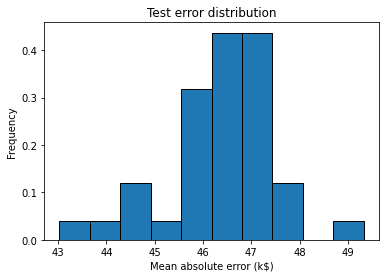

In [18]:
import matplotlib.pyplot as plt

cv_results["test_error"].plot.hist(bins=10, edgecolor="black", density=True)
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Test error distribution")

Observamos que o erro de teste está agrupado em torno de 47 k\\$ e
varia de 43 k\\$ a 50 k\\$.

In [20]:
print(f"The mean cross-validated testing error is: "
      f"{cv_results['test_error'].mean():.2f} k$")

The mean cross-validated testing error is: 46.36 k$


In [21]:
print(f"The standard deviation of the testing error is: "
      f"{cv_results['test_error'].std():.2f} k$")

The standard deviation of the testing error is: 1.17 k$


Observe que o desvio padrão é muito menor do que a média: poderíamos
resumir que nossa estimativa de validação cruzada do erro de teste é
46,36 +/- 1,17 k\\$.

Se tivéssemos que treinar um único modelo no conjunto de dados completo (sem
validação cruzada) e mais tarde teve acesso a uma quantidade ilimitada de teste
dados, esperaríamos que seu verdadeiro erro de teste caísse perto disso
região.

Embora esta informação seja interessante em si mesma, deve ser comparada com
a escala da variabilidade natural do vetor `alvo` em nosso conjunto de dados.

Deixe-nos representar graficamente a distribuição da variável alvo:

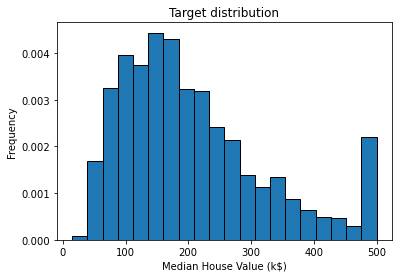

In [22]:
target.plot.hist(bins=20, edgecolor="black", density=True)
plt.xlabel("Median House Value (k$)")
_ = plt.title("Target distribution")

In [24]:
print(f"O standard deviation do alvo é: {target.std():.2f} k$")

O standard deviation do alvo é: 115.40 k$


A variável de destino varia de perto de 0 k\\$ até 500 k\\$ e, com um
desvio padrão em torno de 115 k\\$.

Notamos que a estimativa média do erro de teste obtida por
a validação cruzada é um pouco menor do que a escala natural de variação do
variável de destino. Além disso, o desvio padrão da validação cruzada
estimativa do erro de teste é ainda menor.

Este é um bom começo, mas não necessariamente o suficiente para decidir se o
o desempenho de generalização é bom o suficiente para tornar nossa previsão útil em
prática.

Lembramos que nosso modelo comete, em média, um erro em torno de 47 k\\$. Com isso
informações e olhando para a distribuição de destino, tal erro pode ser
aceitável ao prever casas com 500 k \$. No entanto, seria um
questão com uma casa com um valor de 50 k\\$. Assim, isso indica que nosso
métrica (erro médio absoluto) não é ideal.

Em vez disso, podemos escolher uma métrica relativa ao valor alvo para prever: o
o erro percentual médio absoluto teria sido uma escolha muito melhor.

Mas em todos os casos, um erro de 47 k\\$ pode ser muito grande para ser usado automaticamente
nosso modelo para marcar os valores da casa sem supervisão especializada.

## Mais detalhes sobre `cross_validate`

Durante a validação cruzada, muitos modelos são treinados e avaliados. Na verdade, o
número de elementos em cada array da saída de `cross_validate` é um
resultam de um desses procedimentos `fit` /` score`. Para torná-lo explícito, é
possível recuperar esses modelos ajustados para cada uma das divisões / dobras por
passando a opção `return_estimator = True` em` cross_validate`.

In [25]:
cv_results = cross_validate(regressor, data, target, return_estimator=True)
cv_results

{'fit_time': array([0.31623077, 0.13062978, 0.18691611, 0.17627311, 0.31074548]),
 'score_time': array([0.        , 0.00303006, 0.00206232, 0.00501227, 0.00928807]),
 'estimator': (DecisionTreeRegressor(random_state=0),
  DecisionTreeRegressor(random_state=0),
  DecisionTreeRegressor(random_state=0),
  DecisionTreeRegressor(random_state=0),
  DecisionTreeRegressor(random_state=0)),
 'test_score': array([0.26291527, 0.41947109, 0.44492564, 0.23357874, 0.40788361])}

In [26]:
cv_results["estimator"]

(DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(random_state=0))

Os cinco regressores da árvore de decisão correspondem às cinco decisões ajustadas
árvores nas diferentes dobras. Ter acesso a esses regressores é útil
porque permite inspecionar os parâmetros internos ajustados destes
regressores.

No caso em que você está interessado apenas na pontuação do teste, scikit-learn
fornecer uma função `cross_val_score`. É idêntico a chamar o
função `cross_validate` e para selecionar o` test_score` apenas (como nós
extensivamente nos blocos de notas anteriores).

In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regressor, data, target)
scores

array([0.26291527, 0.41947109, 0.44492564, 0.23357874, 0.40788361])

## Resumo

Neste caderno, vimos:

* a necessidade de dividir os dados em um conjunto de treinamento e teste;
* o significado dos erros de treinamento e teste;
* a estrutura geral de validação cruzada com a possibilidade de estudar
  variações estatísticas de desempenho;